In [1]:
import pandas as pd

In [2]:
df=pd.read_pickle('/data/jfraile/Programs/COP27/datasets_with_answer/political_narratives_validation_only_none_narrative.pkl')

In [3]:
# Función segura para convertir a int
def safe_int(x):
    try:
        return int(x)
    except ValueError:
        return x

# Aplicar a toda la columna
df['narratives'] = df['narratives'].apply(lambda lst: [safe_int(x) for x in lst])


In [4]:
def has_string(arr):
    """Return True if the list contains at least one string, otherwise False."""
    return any(isinstance(item, str) for item in arr)

In [5]:
df['string']=df['narratives'].apply(has_string)

In [6]:
df[df['string']==True]

,id,text,lang,narratives,string
5,1589743590242385921,Por supuesto que el discurso de Petro en #COP2...,es,[Criticism of leadership style],True
10,1594021001502674944,@robbierobgarcif Con excusa del “cambio climát...,es,"[1, 7, Conspiracy about global control]",True
21,1592570999241048066,"✅. A ver ,a quién no le gusta bañarse en Novie...",es,"[3, 7, Narrative: Minimizar la gravedad indivi...",True
31,1590152051069423617,@DiazCanelB Ya borraste el desastre medioambie...,es,"[1, 2, Narrative: Desacreditar a líderes espec...",True
38,1591454922092187655,800 JETS PRIVADOS HAN LLEGADO A #EGIPTO INCLUI...,es,"[5, 7, Narrative: Hipocresía de élites en la l...",True
...,...,...,...,...,...
19973,1592961793642860544,Very exciting news. #equity #climate #COP27 ht...,en,[Fomentar una Narrativa de Esperanza y Empoder...,True
19975,1590543309155766273,@CalgaryPolice - just warming up the sky with ...,en,"[Desacreditar las Instituciones Clave, Minimiz...",True
19976,1589656395162718210,"@RishiSunak Are you awake and listening, Rishi...",en,"[Desacreditar las Instituciones Clave, Minimiz...",True
19978,1589710917859938304,Humanitarian access blocked in #Tigray. No ban...,en,[Localizar el Impacto],True


In [7]:
dic={
1: "Sembrar la Duda sobre la Ciencia",
2: "Desacreditar las Instituciones Clave",
3: "Minimizar la Gravedad (Retardismo)",
4: "Explotar el Costo Económico",
5: "Promover la Inacción (Shifting the Blame)",
6: "Promover Soluciones Dilatorias (Retardismo Tecnológico)",
7: "Polarización y Movilización Antirregulación",
8: "Infiltración y Cabildeo Directo",
9: "Establecer la Urgencia y la Base Científica",
10: "Localizar el Impacto",
11: "Conectar Mitigación y Adaptación",
12: "Fomentar una Narrativa de Esperanza y Empoderamiento",
13: "Presionar por una Mayor Ambición (Aumento de las NDC)",
14: "Visibilizar el Liderazgo y la Responsabilidad",
15: "Asegurar la Financiación Climática",
16: "Promover una Transición Justa",
17: "Reforzar el Multilateralismo",
18: "Incorporar al Sector Privado",
19: "Fomentar la Participación Inclusiva",
20: "Divulgar Resultados y Herramientas"
}

In [8]:
key = next((k for k, v in dic.items() if 'Divulgar Resultados y Herramientas' in v), None)

In [9]:
for i in range(len(df)):
    # print(i)
    l=df['narratives'].iloc[i]
    for j in range(len(l)):
        # print(l[j])
        key = next((k for k, v in dic.items() if str(l[j]) in v), None)
        if key!=None:
            l[j]=key
    df.at[i, 'narratives']=l

In [10]:
df['string_2']=df['narratives'].apply(has_string)

In [11]:
print(len(df[df['string']==True]))
print(len(df[df['string_2']==True]))

2260
1116


In [12]:
df

,id,text,lang,narratives,string,string_2
0,1590345075015680002,With NIOZ director @han_dolman @gcos_un #COP27...,es,[],False,False
1,1589943347359387653,@QuinteroCalle @elpais_america El 3er punto de...,es,"[17, 5]",False,False
2,1589625822809579520,Qué pasó que GuaidoG no está en la #COP27? 😂,es,[],False,False
3,1589444416837627904,#COP27 \n👉 El tema ahora es el financiamiento ...,es,"[15, 10]",False,False
4,1590073066738315264,Fundación Natura participa en la #COP27 como o...,es,"[18, 19]",False,False
...,...,...,...,...,...,...
19995,1592708815551856642,Idea: how about @GeorgeHeyman you meet with @S...,en,"[7, 15]",False,False
19996,1592502093214253056,Join Kenya platform for climate Governance Nat...,en,[19],False,False
19997,1591687280288493568,Thank you Minister. The hard decisions must be...,en,"[15, 10]",False,False
19998,1589656766941343744,"While Ethiopia does not produce a lot of CO2, ...",en,"[14, 18]",False,False


In [13]:
dft=df[(df['string_2'] == True)]

In [14]:
obj_list=[]
for i in range(len(dft)):
    # print(i)
    l=dft['narratives'].iloc[i]
    for x in l:
        if isinstance(x, str):
            obj_list.append(x)
obj_list=list(set(obj_list))

In [15]:
len(obj_list)

1012

In [16]:
dic_values=list(dic.values())

## Semantic Similarity

In [17]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import HDBSCAN

/data/jfraile/ml/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# # model_name = '/data/jfraile/llms/Qwen3-Embedding-8B'
# model_name = '/data/jfraile/llms/paraphrase-multilingual-MiniLM-L12-v2'
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# # device_map='auto' will automatically distribute layers across available GPUs
# model = AutoModel.from_pretrained(
#     model_name,
#     device_map="auto",
#     # torch_dtype=torch.float16
# )

In [19]:
# def get_embeddings_in_batches(sentences, batch_size=8):
#     all_embeddings = []
#     for i in range(0, len(sentences), batch_size):
#         batch = sentences[i:i + batch_size]
#         inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to("cuda:0")
#         with torch.no_grad():
#             outputs = model(**inputs)
#             embeddings = outputs.last_hidden_state.mean(dim=1)
#             all_embeddings.append(embeddings.cpu())
#         torch.cuda.empty_cache()  # libera VRAM tras cada batch
#     return torch.cat(all_embeddings, dim=0)

In [20]:
# obj_list_no_cop=[x.replace('COP27', '') for x in obj_list]
# obj_list_no_cop=[x.replace('COP', '') for x in obj_list_no_cop]
# obj_list=obj_list_no_cop

In [21]:
# # Compute embeddings for both lists
# obj_embeddings = get_embeddings_in_batches(obj_list, 100)
# dic_embeddings = get_embeddings_in_batches(dic_values, 100)

In [22]:
# torch.save(obj_embeddings, "embeddings/obj_embeddings_20000_mini.pt")
# torch.save(dic_embeddings, "embeddings/dic_embeddings_20000_mini.pt")

In [79]:
obj_embeddings = torch.load("embeddings/obj_embeddings_20000_mini.pt")
dic_embeddings = torch.load("embeddings/dic_embeddings_20000_mini.pt")

In [80]:
# obj_embeddings = torch.load("embeddings/obj_embeddings_20000.pt")
# dic_embeddings = torch.load("embeddings/dic_embeddings_20000.pt")

In [81]:
combined_embeddings = torch.cat((dic_embeddings, obj_embeddings), dim=0)

In [82]:
hdb=HDBSCAN(min_cluster_size=2, n_jobs=-1)
labels=hdb.fit_predict(combined_embeddings)

In [83]:
df_cluster = pd.DataFrame({
    "sentence": dic_values+obj_list,
    "cluster": labels
})


In [84]:
df_cluster['cluster'].value_counts()

cluster
 0    1028
 1       2
-1       2
Name: count, dtype: int64

In [85]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Define number of clusters (start with 20 if you already have 20 labels)
kmeans = KMeans(n_clusters=100, n_init=200, random_state=42)
labels = kmeans.fit_predict(combined_embeddings)

In [86]:
df_cluster_k = pd.DataFrame({
    "sentence": dic_values+obj_list,
    "cluster": labels
})


In [98]:
df_cluster_k[:20]['cluster'].value_counts()

cluster
45    3
75    2
29    2
6     1
11    1
21    1
67    1
50    1
14    1
44    1
90    1
55    1
20    1
98    1
63    1
72    1
Name: count, dtype: int64

In [88]:
df_cluster_k['cluster'].value_counts()

cluster
59    51
43    50
33    31
3     28
23    25
      ..
38     1
66     1
49     1
88     1
78     1
Name: count, Length: 100, dtype: int64

In [89]:
df_cluster_k[df_cluster_k['cluster']==10]

,sentence,cluster
64,Confusión sobre la Implementación Local,10
117,Critique of the summit's focus and highlightin...,10
146,Destacar la recepción positiva de un líder nac...,10
164,"Sustainability is about survival, and actions ...",10
185,Estética y Emocionalidad,10
224,Highlighting ocean-related discussions at COP27,10
288,Promover la reflexión sobre el comportamiento ...,10
327,Critique of offsetting and carbon credits,10
493,Resaltar la importancia de discursos inspirado...,10
579,Geopolitical framing of climate action,10


In [90]:
import numpy as np

cluster_id = 47

# Subconjunto del DataFrame con el cluster elegido
dft_2 = df_cluster_k[df_cluster_k['cluster'] == cluster_id]

# Obtener los índices originales de esas oraciones
cluster_indices = dft_2.index.values

# Obtener los embeddings correspondientes
cluster_vecs = obj_embeddings[cluster_indices].cpu().numpy()

# Centroide del cluster
centroid = kmeans.cluster_centers_[cluster_id]

# Calcular distancia euclídea de cada vector al centroide
distances = np.linalg.norm(cluster_vecs - centroid, axis=1)

# Encontrar índice del embedding más cercano
closest_idx = np.argmin(distances)

# Obtener la frase representativa
representative_sentence = obj_list[cluster_indices[closest_idx]]

print(f"Representative sentence for cluster {cluster_id} → {representative_sentence}")


Representative sentence for cluster 47 → Ethiopia's Progress in Poverty Reduction Linked to Green Economy


In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

def plot_elbow_method(data, k_range=(2, 15), random_state=42):
    """
    Plots the Elbow Method curve to help determine the optimal number of clusters for K-Means.

    Parameters:
        data (ndarray or DataFrame): Input feature data.
        k_range (tuple): Range of cluster numbers to test, inclusive of both ends.
        random_state (int): Seed for reproducibility.

    Returns:
        None. Displays a plot.
    """
    inertias = []
    ks = range(k_range[0], k_range[1] + 1)

    for k in tqdm(ks):
        model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
        model.fit(data)
        inertias.append(model.inertia_)  # Sum of squared distances to closest cluster centre

    plt.figure(figsize=(8, 5))
    plt.plot(ks, inertias, marker='o', linestyle='-', linewidth=1.5)
    plt.title("Elbow Method for Optimal K", fontsize=14)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia (Sum of squared distances)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


100%|██████████| 199/199 [00:07<00:00, 28.41it/s]


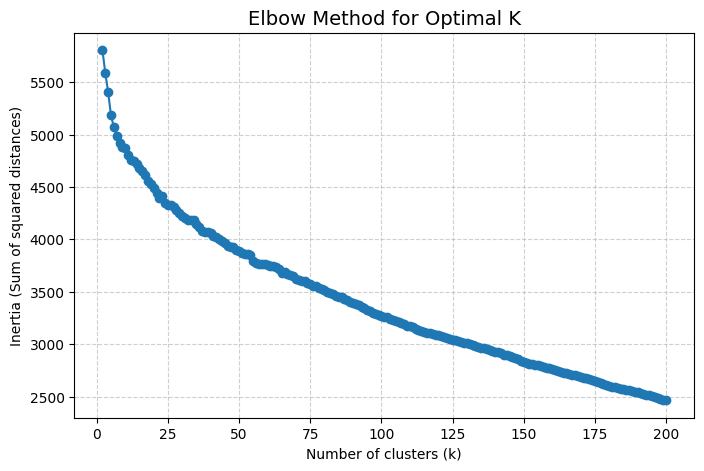

In [92]:
plot_elbow_method(combined_embeddings, k_range=(2, 200))

In [93]:
from sklearn.metrics import calinski_harabasz_score

def best_k_by_calinski(data, k_range=(2, 200), random_state=42):
    best_k = None
    best_score = -1

    for k in tqdm(range(k_range[0], k_range[1] + 1)):
        model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
        labels = model.fit_predict(data)
        score = calinski_harabasz_score(data, labels)
        if score > best_score:
            best_k, best_score = k, score

    print(f"Best k by Calinski–Harabasz: {best_k} (score={best_score:.2f})")
    return best_k


In [94]:
best_k_by_calinski(combined_embeddings)

100%|██████████| 199/199 [00:08<00:00, 24.64it/s]

Best k by Calinski–Harabasz: 2 (score=105.62)


2

In [95]:
from sklearn.metrics import davies_bouldin_score

def best_k_by_davies(data, k_range=(2, 200), random_state=42):
    best_k = None
    best_score = float('inf')

    for k in range(k_range[0], k_range[1] + 1):
        model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
        labels = model.fit_predict(data)
        score = davies_bouldin_score(data, labels)
        if score < best_score:
            best_k, best_score = k, score

    print(f"Best k by Davies–Bouldin: {best_k} (score={best_score:.3f})")
    return best_k


In [96]:
best_k_by_calinski(combined_embeddings)

100%|██████████| 199/199 [00:08<00:00, 24.35it/s]

Best k by Calinski–Harabasz: 2 (score=105.62)


2